## Приоритизация гипотез и анализ результатов A/B-теста в работе интернет-магазина с целью увеличения выручки.

Вместе с отделом маркетинга нами был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### Оглавление:  
1. [Часть 1](#step1) Приоритизация гипотез.
2. [Часть 2](#step2) Анализ A/B-теста.

Произведем импортирование необходимых для работы библиотек.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Часть 1. Приоритизация гипотез.<a id="step1"></a>   
</div>

Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируют.

Прочитаем файл, в котором содержатся 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами 'Reach', 'Impact', 'Confidence', 'Effort'.

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Описание компонентов фреймворка:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [5]:
hypothesis['ICE'] = hypothesis['ICE'].astype('int')

In [6]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1


Наиболее перспективные гипотезы по ICE - 8, 0, 7 и 6.

2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [8]:
hypothesis['RICE'] = hypothesis['RICE'].astype('int')

In [9]:
hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3


Наиболее перспективные гипотезы по RICE - 7, 2, 0 и 6.

3. Рассмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE.

Мы видим, что одинаково перспективные гипотезы, что по фраймворку ICE, что RICE - 0, 6 и 7. Однако места, которые занимают гипотезы сильно разняться. Поэтому, кроме гипотез, также будем учитывать то, как много пользователей гипотеза затронет. Этот параметр(Reach) у гипотезы 7 самый максимальный(10) и поэтому по фреймворку RICE 7 гипотеза занимает первое место.

#### Часть 2. Анализ A/B-теста. <a id="step2"></a>   
</div>

Вы провели A/B-тест и получили результаты, которые описаны в файлах '/datasets/orders.csv' и '/datasets/visitors.csv'. Прочитаем их.

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Данная таблица содержит информацию о заказах, когда они были совершены, покупателем из какой группы и какую выручку принесли.

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В данной таблице мы видим, сколько в определенный день было посетителей из группы.

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Мы видим, что таблицы не содержат пропусков, поэтому в качестве предобработки необходимо лишь у стобцов с датой заменить тип данных на datetime.

In [14]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Сначала создадим дф без дубликатов.

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()

Далее получим агрегированные кумулятивные по дням данные о заказах.

In [17]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях.

In [18]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одной с понятными названиями столбцов.

In [19]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

In [20]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

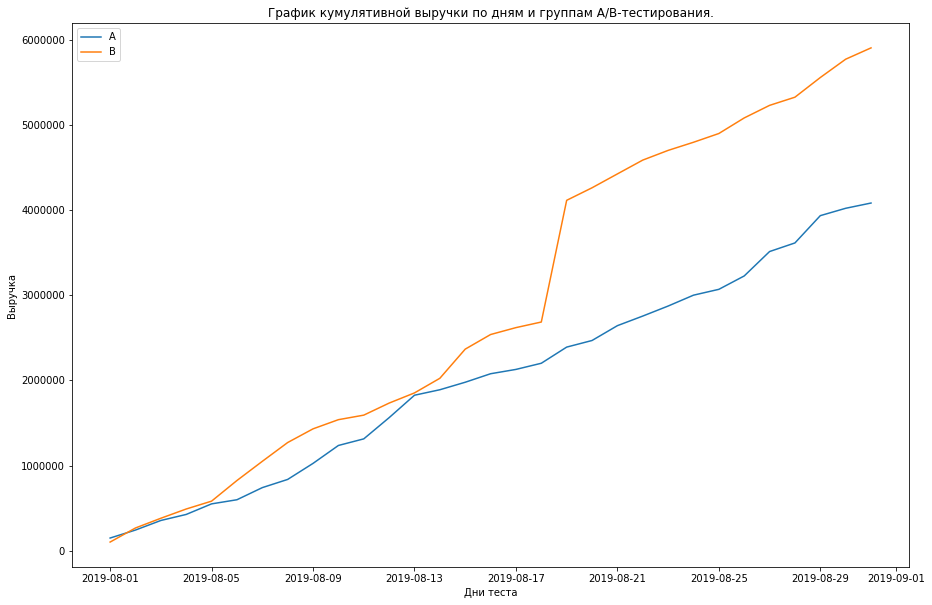

In [21]:
plt.figure(figsize=(15, 10))
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования.')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дни теста')
plt.ylabel('Выручка')
plt.legend()

Мы видим, что группа В еще в самом начале по выручке вырвалась вперед и продолжала лидировать все время. Под конец сильно оторвавшись от группы А. Это может быть связано с аномальными покупателями, которые делали очень большие заказы. 

#### 2. Постройте график кумулятивного среднего чека по группам. 

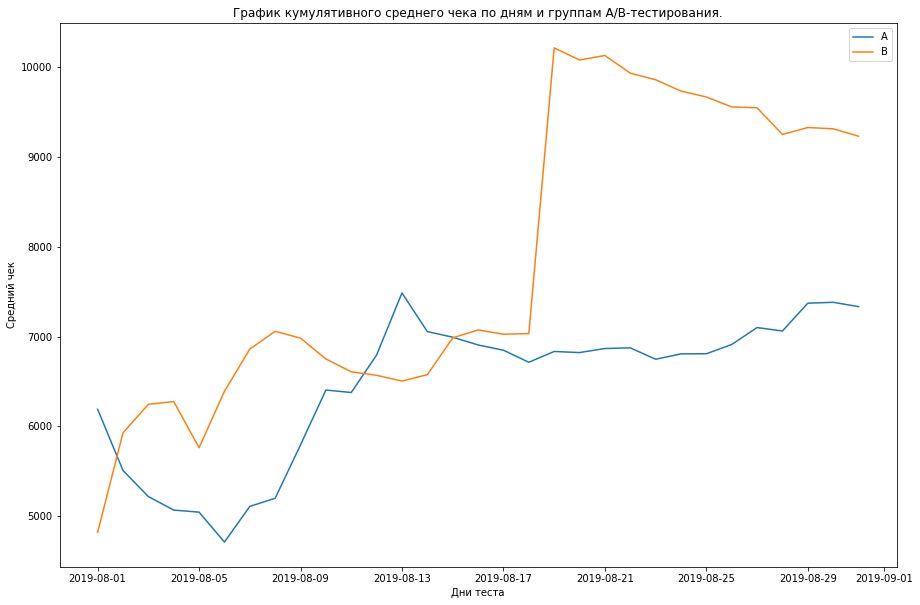

In [22]:
plt.figure(figsize=(15, 10))
plt.title('График кумулятивного среднего чека по дням и группам A/B-тестирования.')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дни теста')
plt.ylabel('Средний чек')
plt.legend()

Мы видим, что в один день произошел скачок среднего чека. В тот же день произошел резкий скачок выручки. И наверняка именно в этот день и произошел аномальный самый большой заказ, или даже несколько.

#### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

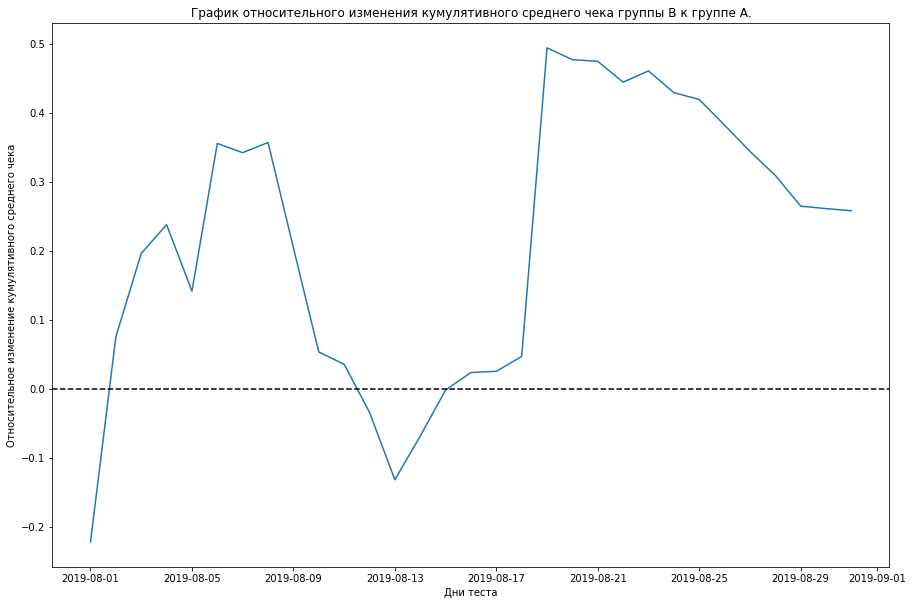

In [24]:
plt.figure(figsize=(15, 10))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дни теста')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.axhline(y=0, color='black', linestyle='--')

Мы видим, что были сильные приросты в графике несколько дней из-за того, что выручка у группы В имела скачок в графике. Скорее всего именно в дни когда были эти приросты и происходили аномальные заказы.

#### 4. Постройте график кумулятивной конверсии по группам. 

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

['2019-08-01', '2019-09-01', 0, 0.05]

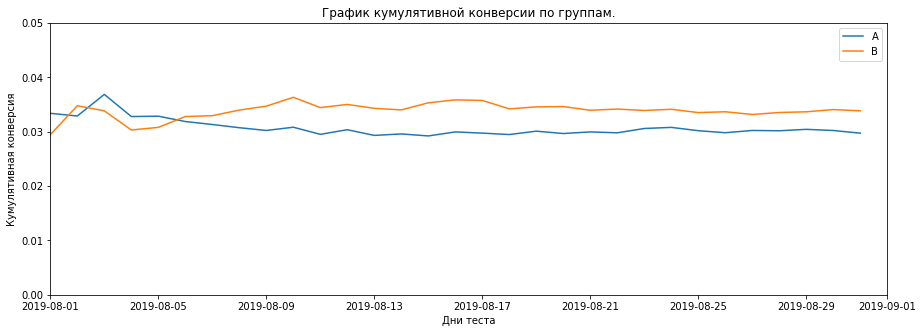

In [26]:
plt.figure(figsize=(15, 5))
plt.title('График кумулятивной конверсии по группам.')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дни теста')
plt.ylabel('Кумулятивная конверсия')
plt.legend()
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05])

Вначале большую конверсию имела группа А, но потом происходили колебания, в результате которых группа В вырвалась вперед и закрепилась на примерно одном значении, выше группы А. 

#### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A.

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

['2019-08-01', '2019-09-01', -0.5, 0.5]

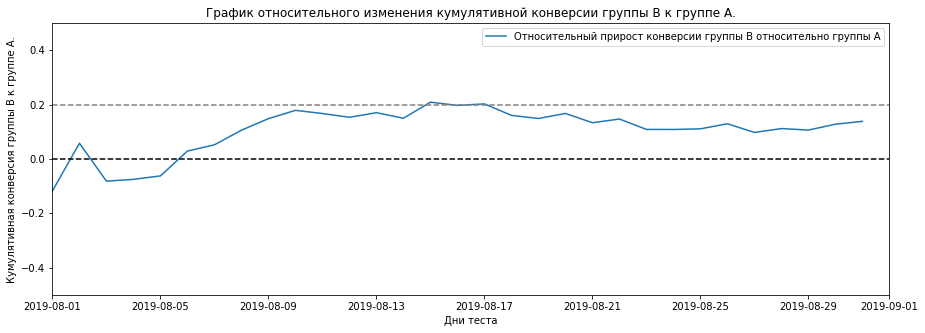

In [28]:
plt.figure(figsize=(15, 5))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A.')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xlabel('Дни теста')
plt.ylabel('Кумулятивная конверсия группы B к группе A.')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

По конверсии группа В лидирует примерно с самого начала теста. Постепенно растет до 20% потом происходит маленькое падение изначение устанавливается примерно на 15% конверсии.

По графикам мы установили, что в связи со скачками на графиках, в данных есть выбросы. Необходимо их выявить, убрать из данных и определить как с помощью этого изменятся результаты теста.

#### 6. Построение точечного графика количества заказов по пользователям.

In [29]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','transaction']

Text(0, 0.5, 'Количество заказов')

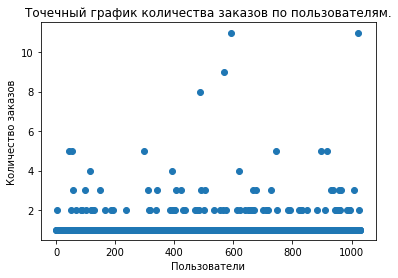

In [30]:
x_values_orders = pd.Series(range(0,len(ordersByUsers['transaction'])))
plt.title('Точечный график количества заказов по пользователям.')
plt.scatter(x_values_orders, ordersByUsers['transaction'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

Мы видим, что основная масса заказов лежат в пределах до двух заказов на покупателя.

#### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [31]:
np.percentile(ordersByUsers['transaction'], [95, 99])

array([2., 4.])

Так и есть, только 5% человек делают больше 2 покупок. И только 1% делает больше 4.

#### 8. Построение точечного графика стоимостей заказов. 

С помощью точечной диаграммы посмотрим содержат ли результаты теста выбросы.

Text(0, 0.5, 'Стоимость заказа')

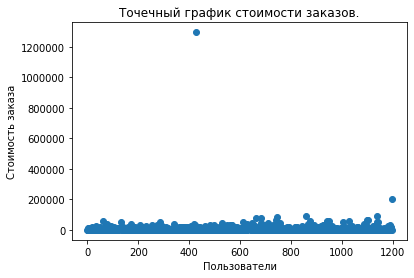

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Точечный график стоимости заказов.')
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')

Мы видим 2 точки выбросов. Если такой дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался. А остальные выручки с заказов находятся в пределах до 100000.

#### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

С помощью percentile определим выручку наибольшей аудитории и количество заказов на одного человека. Человек с большим количеством заказов тоже будет выбросом.

In [33]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Только у 5% покупателей сумма заказов превышает  28000.

Создадим дф с кумулятивной выручкой.

In [34]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [35]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим полученные нами дф и создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'userId' и 'orders', где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.

In [36]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Названия новых столбцов данных:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применим тест Манна-Уитни и посчитаем статистическую значимость различия конверсии по результатам двух недель теста. Выведем p-value для сравнения конверсии между группами и относительное различие в конверсии между группами.

In [38]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.00840
0.138


По сырым данным, без удаления выбросов:
- Первое число — p-value = 0.0084 значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. И относительный прирост группы B равен 13,8% — второе число в выводе.

#### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Выведем p-value для сравнения средних чеков между группами и относительный прирост среднего чека группы B.

In [39]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value = 0.365 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в выручке между группами есть различия, нет. Но при этом, средний чек группы B значительно выше среднего чека группы A на 25,9%.

#### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [40]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

Всего аномальных пользователей обнаружилось:

In [41]:
abnormalUsers.count()

74

In [42]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Посчитаем конверсию между группами с учетом удаления аномальных пользователей. Посмотрим как их действия повлияли на результаты теста.

In [43]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.173


По конверсии данные практически не изменились. Но прирост группы В увеличился и стал 17,3% вместо 13,8%

#### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [44]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.369
-0.020


P-value = 0.369 значительно больше 0.05, с учетом удаления аномальных пользователей он почти не изменился. Значит, причин отвергать нулевую гипотезу и считать, что в выручке между группами есть различия, все еще нет. Но при этом, средний чек группы B оказался лишь немного меньше среднего чека группы A, в отличии от сырых данных. И всего на 2%.

#### 14. Примем решение по результатам теста

Выводы из полученной информации:
- Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
- А по среднему чеку между группами и по «сырым», и по данным после фильтрации аномалий есть значимое статистическое различие. Изменилась лидирующая группа. Сначала средний чек был больше в группе В, а после фильтрации в группе А;

Исходя из обнаруженных фактов, тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая. Потому, что до удаления аномальных данных хоть и казалось, что группа В лучше группы А, но после их удаления оказалось, что средний чек в группе В ниже, чем в группе А, а так как весь смысл бизнеса в получении выручки этот ход не оптимален.

## Общий вывод.

### Приоритизация гипотез.

В процессе приоритизации гипотез мы увидели, что одинаково перспективные гипотезы, что по фраймворку ICE, что RICE были 0, 6 и 7. Однако места, которые занимают гипотезы сильно разняться. Поэтому, кроме расчета по фраймворку, учитывали то, как много пользователей гипотеза затронет. Этот параметр(Reach) у гипотезы 7 самый максимальный(10) и поэтому по фреймворку RICE 7 гипотеза занимает первое место.

### А/Б-тест.

Мы определили по графикам, что группа В еще в самом начале по выручке вырвалась вперед и продолжала лидировать все время, также как и со средним чеком. Под конец сильно оторвавшись от группы А. Но из-за больших скачков на графике поняли, что в данных содержаться выбросы, которые негативно влияют на результаты теста.

После расчета статистической значимости различий в среднем чеке заказа и выручке между группами по «очищенным» данным оказалось, что средний чек и выручка в группе В ниже, чем в группе А, а так как весь смысл бизнеса в получении выручки этот ход не оптимален. Потому, что до удаления аномальных данных хоть и казалось, что группа В лучше группы А, но после их удаления оказалось, что средний чек в группе В ниже, чем в группе А, а так как весь смысл бизнеса в получении выручки этот ход не оптимален.

Исходя из обнаруженных фактов, мы определили, что тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая.